<a href="https://colab.research.google.com/github/SreehithaKorrapati/aiml-projects/blob/main/Loan_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


# Install necessary libraries (if not already installed)
!pip install seaborn matplotlib scikit-learn


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wordsforthewise/lending-club")

print("Path to dataset files:", path)

100%|██████████| 1.26G/1.26G [00:09<00:00, 150MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/wordsforthewise/lending-club/versions/3


Files in the dataset directory: ['accepted_2007_to_2018q4.csv', 'rejected_2007_to_2018q4.csv', 'rejected_2007_to_2018Q4.csv.gz', 'accepted_2007_to_2018Q4.csv.gz']
Dataset loaded successfully!
Shape of the dataset: (2260701, 151)
Columns in the dataset: Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

Preview of the dataset:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN



Missing values in the dataset:
member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_reason                               2249784
hardship_status                               2249784
deferral_term                                 2249784
                                               ...   
pymnt_plan                                         33
url                                                33
purpose                                            33
funded_amnt                                        33
loan_amnt                                          33
Length: 150, dtype: int64


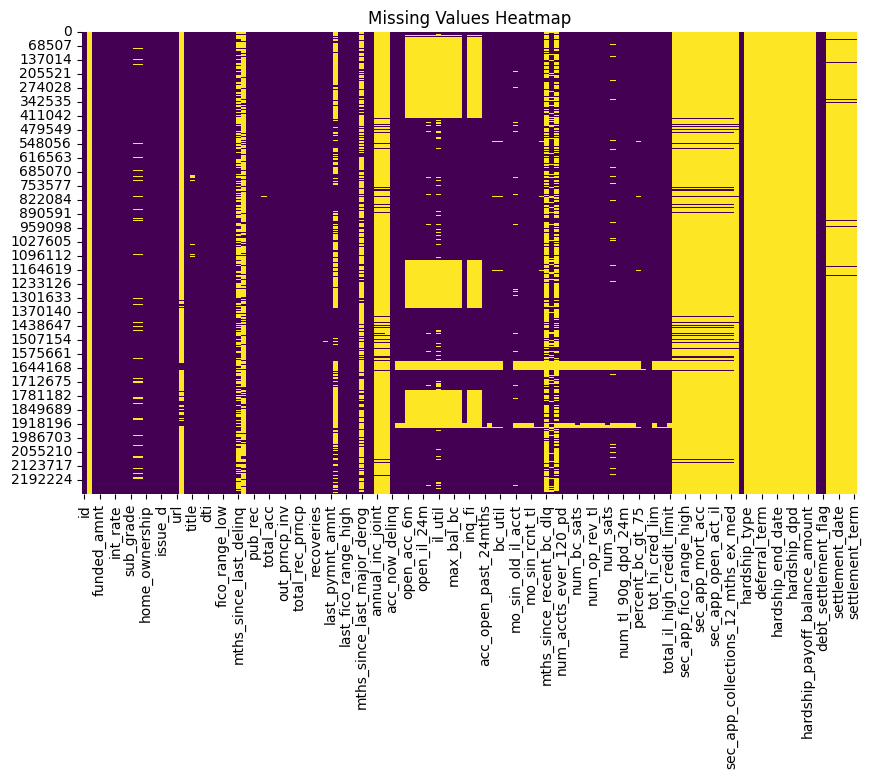

In [4]:
# Import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the dataset files
dataset_path = "/root/.cache/kagglehub/datasets/wordsforthewise/lending-club/versions/3"

# List the files in the dataset directory
files = os.listdir(dataset_path)
print("Files in the dataset directory:", files)

# Identify the correct file to load
file_name = "accepted_2007_to_2018Q4.csv.gz"  # Use the .csv.gz file
file_path = os.path.join(dataset_path, file_name)

# Load the dataset directly from the compressed file
try:
    data = pd.read_csv(file_path, compression='gzip', low_memory=False)
    print("Dataset loaded successfully!")
except FileNotFoundError as e:
    print("Error:", e)
    print("Please check the file name and path.")

# Display basic information about the dataset
print("Shape of the dataset:", data.shape)
print("Columns in the dataset:", data.columns)
print("\nPreview of the dataset:")
display(data.head())

# Check for missing values
print("\nMissing values in the dataset:")
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

# Visualize the missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [5]:
# Define a threshold for dropping columns with missing values
threshold = 0.8  # 80% missing values
missing_ratio = data.isnull().mean()  # Calculate the proportion of missing values
columns_to_drop = missing_ratio[missing_ratio > threshold].index

# Drop columns with high missing values
print(f"Dropping {len(columns_to_drop)} columns with more than {threshold * 100}% missing values.")
data_cleaned = data.drop(columns=columns_to_drop)

# Drop rows with missing values in essential columns (e.g., 'loan_amnt', 'int_rate', 'term')
essential_columns = ['loan_amnt', 'int_rate', 'term']
data_cleaned = data_cleaned.dropna(subset=essential_columns)

# Verify the shape of the cleaned dataset
print("Shape after cleaning:", data_cleaned.shape)

# Check remaining missing values
remaining_missing_values = data_cleaned.isnull().sum()
remaining_missing_values = remaining_missing_values[remaining_missing_values > 0].sort_values(ascending=False)
print("\nRemaining missing values after cleaning:")
print(remaining_missing_values)

cleaned_file_path = os.path.join(dataset_path, "accepted_loans_cleaned.csv")
data_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_file_path}")


Dropping 39 columns with more than 80.0% missing values.
Shape after cleaning: (2260668, 112)

Remaining missing values after cleaning:
mths_since_recent_bc_dlq          1740967
mths_since_last_major_derog       1679893
mths_since_recent_revol_delinq    1520309
next_pymnt_d                      1345310
mths_since_last_delinq            1158502
                                   ...   
delinq_amnt                            29
open_acc                               29
pub_rec                                29
annual_inc                              4
zip_code                                1
Length: 74, dtype: int64
Cleaned dataset saved to: /root/.cache/kagglehub/datasets/wordsforthewise/lending-club/versions/3/accepted_loans_cleaned.csv


In [6]:
# Define a threshold for columns with high missing values to drop
high_missing_threshold = 0.6  # 60% missing values
columns_to_drop = remaining_missing_values[remaining_missing_values > high_missing_threshold * len(data_cleaned)].index

# Drop these columns
print(f"Dropping {len(columns_to_drop)} columns with more than {high_missing_threshold * 100}% missing values.")
data_cleaned = data_cleaned.drop(columns=columns_to_drop)

# Impute missing values for numerical and categorical columns
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns

# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
data_cleaned[numerical_cols] = num_imputer.fit_transform(data_cleaned[numerical_cols])

# Impute categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
data_cleaned[categorical_cols] = cat_imputer.fit_transform(data_cleaned[categorical_cols])

# Verify there are no remaining missing values
print("\nRemaining missing values after imputation:")
print(data_cleaned.isnull().sum().sum())

final_cleaned_file_path = os.path.join(dataset_path, "final_accepted_loans_cleaned.csv")
data_cleaned.to_csv(final_cleaned_file_path, index=False)
print(f"Final cleaned dataset saved to: {final_cleaned_file_path}")


Dropping 3 columns with more than 60.0% missing values.

Remaining missing values after imputation:
0
Final cleaned dataset saved to: /root/.cache/kagglehub/datasets/wordsforthewise/lending-club/versions/3/final_accepted_loans_cleaned.csv


In [7]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define the source and destination paths
source_path = "/root/.cache/kagglehub/datasets/wordsforthewise/lending-club/versions/3/final_accepted_loans_cleaned.csv"
destination_path = "/content/drive/My Drive/final_accepted_loans_cleaned.csv"

# Copy the file
shutil.copy(source_path, destination_path)
print(f"File saved to Google Drive: {destination_path}")


Mounted at /content/drive
File saved to Google Drive: /content/drive/My Drive/final_accepted_loans_cleaned.csv


In [8]:
from google.colab import files

# Replace with the actual file path of your cleaned dataset
final_cleaned_file_path = "/root/.cache/kagglehub/datasets/wordsforthewise/lending-club/versions/3/final_accepted_loans_cleaned.csv"

# Download the file
files.download(final_cleaned_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Unique values in 'loan_status':
loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64


<ipython-input-9-fbb11f84ec9c>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_cleaned['loan_status_grouped'] = data_cleaned['loan_status'].apply(
<ipython-input-9-fbb11f84ec9c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='loan_status_grouped', palette='viridis')


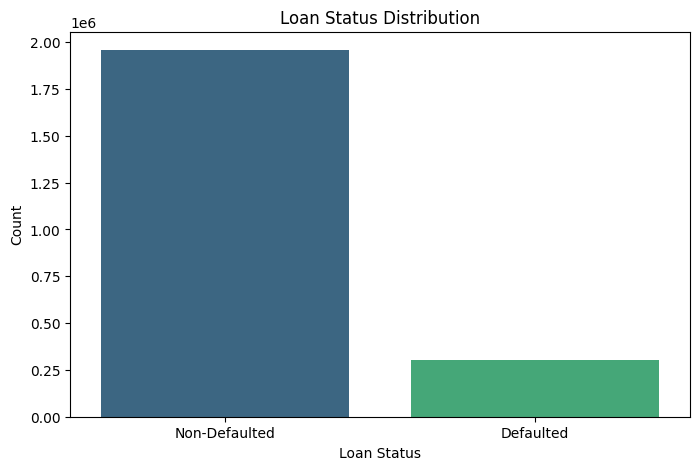

In [9]:
# Analyze the target variable 'loan_status'
print("Unique values in 'loan_status':")
print(data_cleaned['loan_status'].value_counts())

# Group loan statuses into Defaulted and Non-Defaulted
defaulted_status = ['Charged Off', 'Default', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)']
data_cleaned['loan_status_grouped'] = data_cleaned['loan_status'].apply(
    lambda x: 'Defaulted' if x in defaulted_status else 'Non-Defaulted'
)

# Plot the distribution of loan statuses
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned, x='loan_status_grouped', palette='viridis')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


In [12]:
# Identify columns with non-numeric values
non_numeric_cols = []
for col in numerical_cols:
    try:
        pd.to_numeric(data_cleaned[col])
    except ValueError:
        non_numeric_cols.append(col)

print(f"Columns with non-numeric values: {non_numeric_cols}")

# Investigate and handle non-numeric values
for col in non_numeric_cols:
    print(f"Unique values in '{col}':")
    print(data_cleaned[col].unique())

# Replace invalid entries (e.g., 'N') with NaN, then impute
for col in non_numeric_cols:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# Reapply imputation to handle new NaN values
data_cleaned[numerical_cols] = num_imputer.fit_transform(data_cleaned[numerical_cols])


Columns with non-numeric values: []


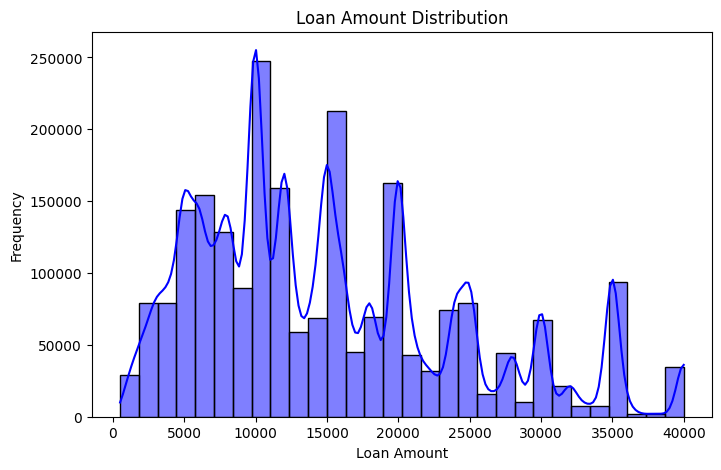

<ipython-input-15-b10257c38633>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='loan_status_grouped', y='int_rate', palette='viridis')


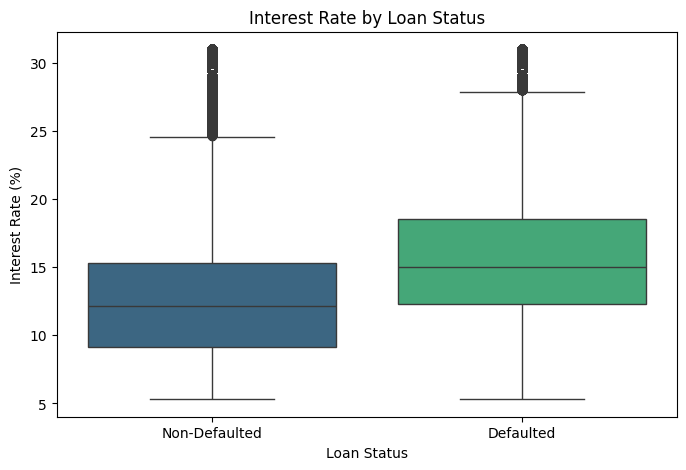

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


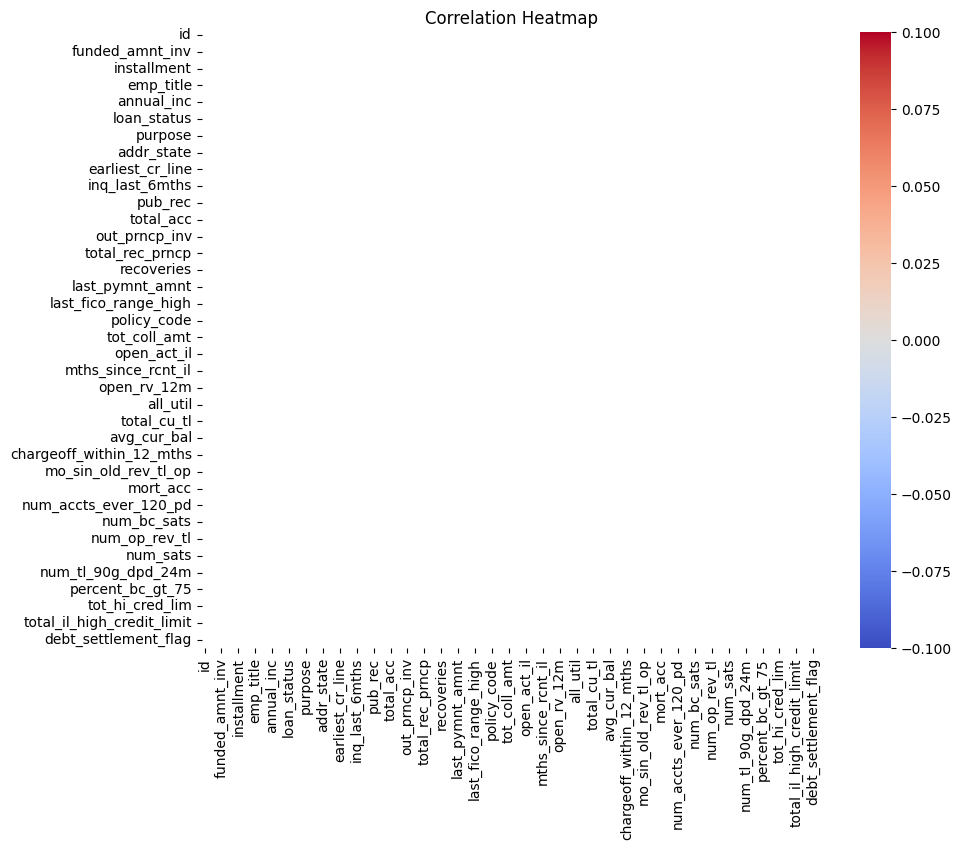

# New Section

In [19]:
import numpy as np  # Ensure numpy is imported

# Avoid division by zero in feature engineering
data_cleaned['loan_to_income_ratio'] = data_cleaned.apply(
    lambda row: row['loan_amnt'] / row['annual_inc'] if row['annual_inc'] > 0 else 0, axis=1
)
data_cleaned['payment_to_income_ratio'] = data_cleaned.apply(
    lambda row: row['installment'] / row['annual_inc'] if row['annual_inc'] > 0 else 0, axis=1
)

# Replace any infinite or NaN values with zeros
data_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
data_cleaned.fillna(0, inplace=True)

# Recheck the statistics
print("Updated statistics for new features:")
print(data_cleaned[['debt_to_income_ratio', 'loan_to_income_ratio', 'payment_to_income_ratio']].describe())


Updated statistics for new features:
       debt_to_income_ratio  loan_to_income_ratio  payment_to_income_ratio
count          2.260668e+06          2.260668e+06             2.260668e+06
mean           1.882345e+01          5.734551e-01             1.678590e-02
std            1.417799e+01          8.873134e+01             2.523802e+00
min           -1.000000e+00          0.000000e+00             0.000000e+00
25%            1.190000e+01          1.250000e-01             3.813626e-03
50%            1.784000e+01          2.000000e-01             5.954167e-03
75%            2.448000e+01          2.985075e-01             8.772802e-03
max            9.990000e+02          4.000000e+04             1.189240e+03


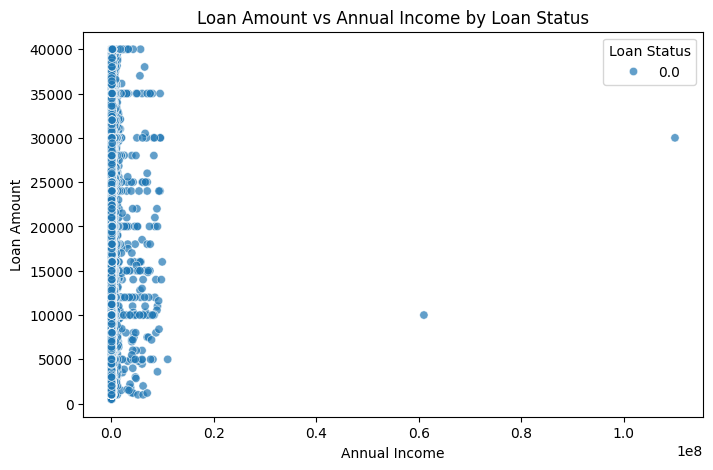

In [20]:
# Filter out rows with zero or extremely low annual income for a meaningful scatter plot
filtered_data = data_cleaned[(data_cleaned['annual_inc'] > 1000) & (data_cleaned['loan_amnt'] > 0)]

# Scatter plot for loan amount vs annual income by loan status
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered_data, x='annual_inc', y='loan_amnt', hue='loan_status_grouped', alpha=0.7)
plt.title('Loan Amount vs Annual Income by Loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right')
plt.show()


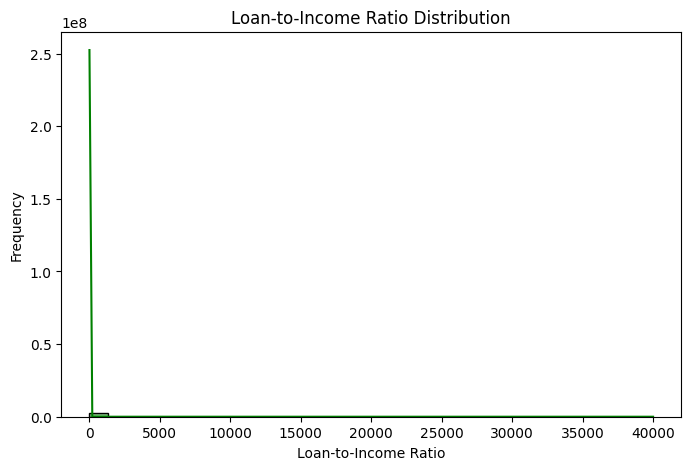

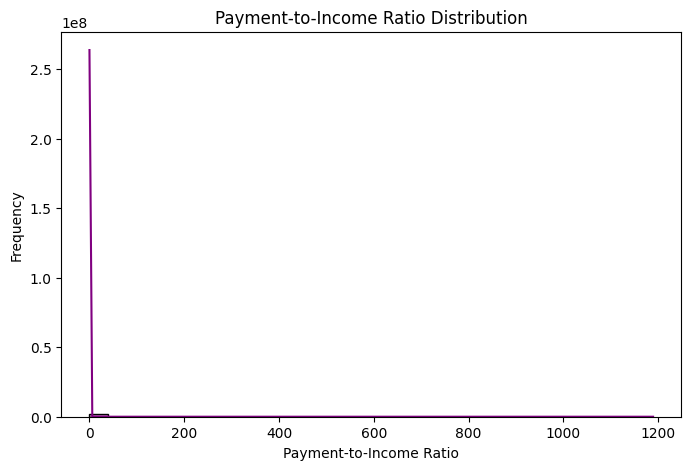

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions for new features
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['loan_to_income_ratio'], kde=True, bins=30, color='green')
plt.title('Loan-to-Income Ratio Distribution')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['payment_to_income_ratio'], kde=True, bins=30, color='purple')
plt.title('Payment-to-Income Ratio Distribution')
plt.xlabel('Payment-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()


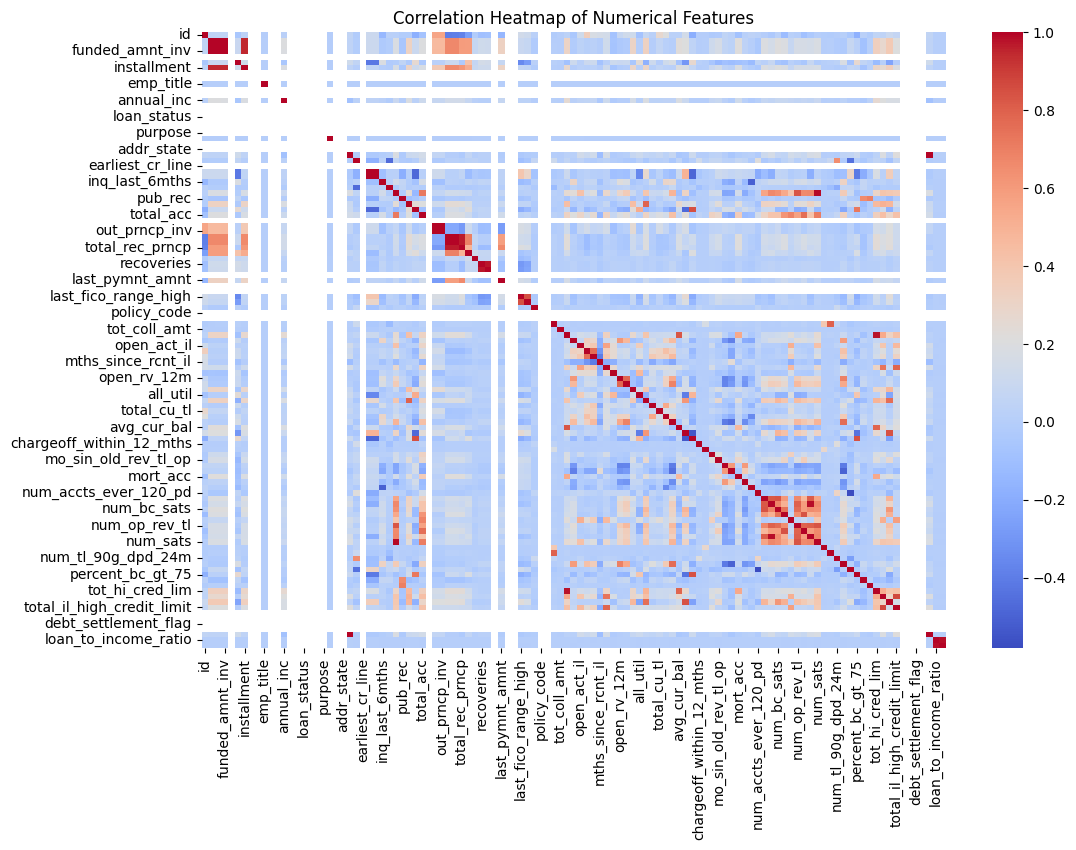

Correlation with loan_status_grouped:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


id                        NaN
loan_amnt                 NaN
funded_amnt               NaN
funded_amnt_inv           NaN
term                      NaN
                           ..
debt_settlement_flag      NaN
loan_status_grouped       NaN
debt_to_income_ratio      NaN
loan_to_income_ratio      NaN
payment_to_income_ratio   NaN
Length: 113, dtype: float64


In [22]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Correlation with target variable
print("Correlation with loan_status_grouped:")
print(data_cleaned.corrwith(data_cleaned['loan_status_grouped'], numeric_only=True).sort_values(ascending=False))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    205040
           1       1.00      1.00      1.00    473161

    accuracy                           1.00    678201
   macro avg       1.00      1.00      1.00    678201
weighted avg       1.00      1.00      1.00    678201

AUC-ROC: 1.0


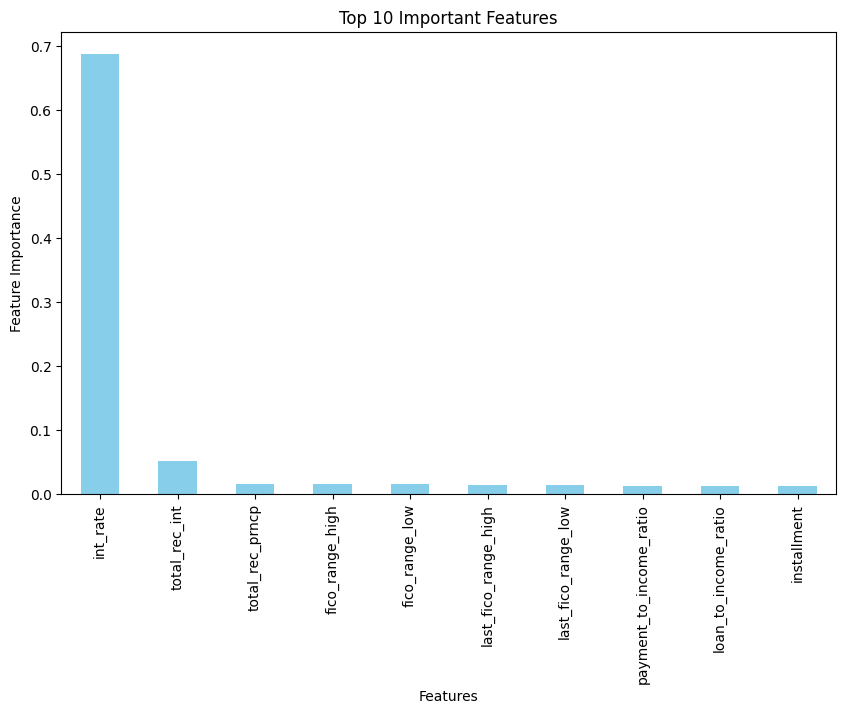

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Encode the new target variable
data_cleaned['interest_rate_group'] = LabelEncoder().fit_transform(data_cleaned['interest_rate_group'])

# Prepare features and target variable
X = data_cleaned.drop(columns=['loan_status', 'loan_status_grouped', 'interest_rate_group'])
y = data_cleaned['interest_rate_group']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

# Plot Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance[:10].plot(kind='bar', color='skyblue')
plt.title('Top 10 Important Features')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.show()


In [24]:
# Prepare features and target variable
X = data_cleaned.drop(columns=['loan_status', 'loan_status_grouped'])
y = LabelEncoder().fit_transform(data_cleaned['loan_status_grouped'])  # Convert target labels to numeric

# Train-test split (70% for training, 30% for testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features (important for certain models like Logistic Regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
from sklearn.feature_selection import VarianceThreshold

# Drop features with near-zero variance
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
X = selector.fit_transform(X)


In [35]:
data_cleaned['interest_rate_group'] = data_cleaned['int_rate'].apply(
    lambda x: 'High Interest' if x > 15 else 'Low Interest'
)
print(data_cleaned['interest_rate_group'].value_counts())


interest_rate_group
Low Interest     1575868
High Interest     684800
Name: count, dtype: int64


In [42]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are already defined

# Step 1: Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Convert scaled data to DataFrame for consistency with indices
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index)

# Step 3: Reset indices for all dataframes
X_train.reset_index(drop=True, inplace=True)
X_train_scaled_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Step 4: Limit both X_train_scaled and y_train to the same subset
X_train_small = X_train.sample(n=10000, random_state=42)
y_train_small = y_train[X_train_small.index]
X_train_scaled_small = X_train_scaled_df.loc[X_train_small.index]

# Step 5: Initialize models with optimized parameters
log_reg = LogisticRegression(random_state=42, max_iter=100)
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)  # Reduced trees and depth
gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)

# Step 6: Train models
log_reg.fit(X_train_scaled_small, y_train_small)
rf.fit(X_train_small, y_train_small)  # Random Forest doesn't need scaling
gb.fit(X_train_scaled_small, y_train_small)

# Step 7: Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled_df)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test_scaled_df)

# Step 8: Evaluation function
def evaluate_model(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

print("Logistic Regression Evaluation:")
evaluate_model(y_test, y_pred_log_reg)

print("Random Forest Evaluation:")
evaluate_model(y_test, y_pred_rf)

print("Gradient Boosting Evaluation:")
evaluate_model(y_test, y_pred_gb)


Logistic Regression Evaluation:
Accuracy: 0.9919537128373447
ROC-AUC Score: 0.9920197789240652
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    205040
           1       1.00      0.99      0.99    473161

    accuracy                           0.99    678201
   macro avg       0.99      0.99      0.99    678201
weighted avg       0.99      0.99      0.99    678201

Confusion Matrix:
 [[203438   1602]
 [  3855 469306]]
--------------------------------------------------
Random Forest Evaluation:
Accuracy: 0.9999115306524172
ROC-AUC Score: 0.9998550689112581
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    205040
           1       1.00      1.00      1.00    473161

    accuracy                           1.00    678201
   macro avg       1.00      1.00      1.00    678201
weighted avg       1.00      1.00      1.00    678201

Confusion